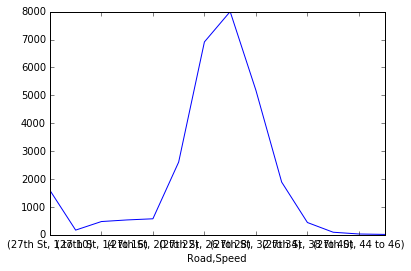

In [19]:
import pandas as pd
from datetime import datetime
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
df_template= pd.read_excel("T:\\Permanent\\Resources\\Traffic Counts\\New Counts For Processing\\ACHD\\batch\\masterSPD60 hunter.xlsx")
df = pd.read_csv("T:\\Permanent\\Resources\\Traffic Counts\\New Counts For Processing\\ACHD\\batch\\Speed60Processed\\60_SpeedTotals.csv")
df_pivot = df.pivot_table(index=['SiteCode','agency','county','onetwoway','counttype','interval','roadtype','Month','Year','Date','Road','Location','Direction','Speed'],columns='Time',values='Count')
df_2 = df_pivot.reindex_axis(sorted(df_pivot.columns, key= lambda x: datetime.strptime(x,'%I:%M %p')),axis=1)
df_2.reset_index(inplace=True)
df_2['Total'] = df_2.iloc[:,14:38].sum(axis=1)
header_list = df_2.iloc[:,14:38].columns.tolist()
template_headers =  [u'midnight',u'am1',u'am2',u'am3',u'am4',u'am5',u'am6',u'am7',u'am8',u'am9',u'am10',u'am11',u'pm12',u'pm1',u'pm2',
 u'pm3',u'pm4',u'pm5',u'pm6',u'pm7',u'pm8',u'pm9',u'pm10',u'pm11']
header_dict = dict(zip(header_list,template_headers))
header_dict.update({'SiteCode': 'Stationno','agency':'Agency','county':'County','counttype':'Counttype','interval':'Interval','roadtype':'Roadtype'})
df_3= df_2.rename(columns=header_dict)
df_3['PM_ID']=np.nan
df_3['Segmentcode']=np.nan
df_3['Day']=np.nan
df_final = df_3[[u'PM_ID',u'Stationno',u'Segmentcode',u'Agency',u'County',u'onetwoway',u'Counttype',u'Interval',u'Roadtype',
 u'Month',u'Year',u'Date',u'Day',u'Road',u'Location',u'Direction',u'Speed',u'Total',u'midnight',u'am1',u'am2',u'am3',u'am4',
 u'am5',u'am6',u'am7',u'am8',u'am9',u'am10',u'am11',u'pm12',u'pm1',u'pm2',u'pm3',u'pm4',u'pm5',u'pm6',u'pm7',u'pm8',u'pm9',
 u'pm10',u'pm11']]
df
hey = df.loc[df['Road']=='27th St']
hey2 = hey.groupby(['Road','Speed'])['Count'].sum()

#df_plot = df.groupby(['Road'])['Count'].sum()
hey2.plot()
plt.show()
#df_final.to_excel("C:\\Users\\hmulhall\\Desktop\\test.xls",index=False)

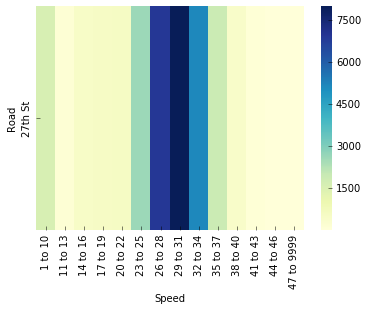

In [41]:
seaborn_plot = hey.pivot_table(index=['Road','D'], columns='Speed', values='Count',aggfunc=np.sum,fill_value=0)
seaborn_plot
sns.heatmap(seaborn_plot,cmap="YlGnBu")